In [20]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

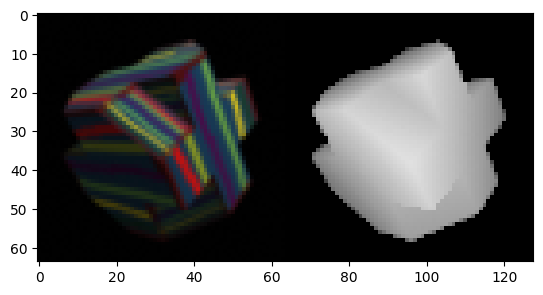

In [2]:
wanted_id = 2500;
myPhoto = np.load('BigDataCubes\CombinedDatasets\Part0Photos.npy')[wanted_id]
myDepth = np.load('BigDataCubes\CombinedDatasets\Part0Depth.npy')[wanted_id]
combined = np.concatenate([myPhoto, myDepth], axis = 1).astype("float32")
plt.imshow(combined);

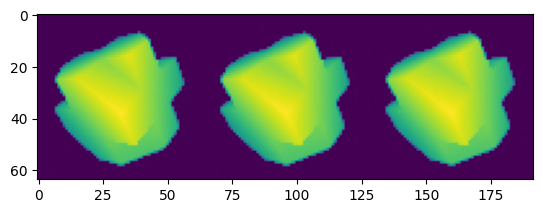

In [3]:
plt.imshow(np.concatenate([myDepth[:, :, 0] , myDepth[:, :, 1] , myDepth[:, :, 2] ], axis = 1).astype("float32"));

In [15]:
def getDepthGraph(photo, depth, cam_z = 5, rotation = 10):
    width_px = 512 
    height_px = 512  
    dpi = 128 
    figsize = (width_px / dpi, height_px / dpi)
    ax = plt.figure(figsize=figsize, dpi=dpi).add_subplot(projection='3d')
    
    colors = photo
    width = photo.shape[0]
    height= photo.shape[1]
    x = np.repeat(np.arange(width), height)
    y = np.tile(np.arange(height), width)
    
    depths = depth[:, :, 0].flatten() * 64
    
    ax.scatter(xs=depths, ys=x, zs=y, c=colors.reshape(-1, 3))
    
    ax.set_xlim(0, 63)
    ax.set_ylim(0, 63)
    ax.set_zlim(0, 63)

    ax.view_init(elev=cam_z, azim=-rotation, roll=0)
    
    #plt.show()
    
    plt.axis('off')
    plt.tight_layout()
    
    fig = plt.gcf()
    fig.canvas.draw()
    
    image_array = np.frombuffer(fig.canvas.buffer_rgba (), dtype=np.uint8)
    image_array = image_array.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    
    plt.close(fig)
    return image_array[:,:,0:3] # тут массив имеет 4 канала, я возвращаю только 3 т.к. прозрачногсть не нужна

In [25]:
my_frames = [getDepthGraph(myPhoto, myDepth, 5, i) for i in 
             [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,80,75,70,65,60,55,50,45,40,35,30,25,20,15,10, 5]]
my_frames = np.array(my_frames)

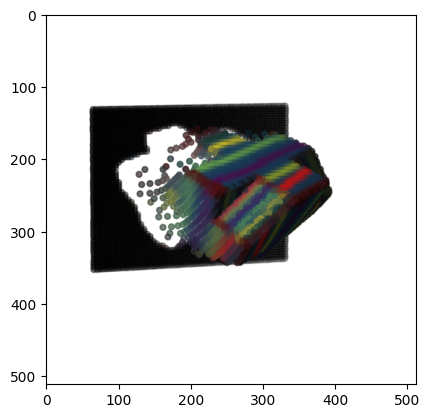

In [27]:
plt.imshow(my_frames[5])

In [28]:
images_array = my_frames.astype(np.uint8)
images = []
for img in images_array:
    images.append(Image.fromarray(img).resize((128, 128)))

images[0].save('depthanimation.gif',
               save_all=True,
               append_images=images[1:],
               duration=100, 
               loop=0)